### Boston Hausing 데이터셋을 로드합니다.

In [157]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

'''
X:
0. CRIM per capita crime rate by town 
    자치 시(town) 별 1인당 범죄율
1. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    25,000 평방피트를 초과하는 거주지역의 비율
2. INDUS proportion of non-retail business acres per town
    비소매상업지역이 점유하고 있는 토지의 비율
3. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    찰스강의 경계에 위치해 있으면 1, 그렇지 않으면 0
4. NOX nitric oxides concentration (parts per 10 million)
    10ppm당 농축 일산화질소
5. RM average number of rooms per dwelling
    주택 1가구당 평균 방의 개수
6. AGE proportion of owner-occupied units built prior to 1940
    1940년 이전에 건축된 소유주택의 비율
7. DIS weighted distances to five Boston employment centres
    5개의 보스턴 직업센터까지의 접근성 지수
8. RAD index of accessibility to radial highways
    방사형 도로까지의 접근성 지수
9. TAX full-value property-tax rate per $10,000
    10,000 달러 당 재산세율
10. PTRATIO pupil-teacher ratio by town
    자치 시(town)별 학생/교사 비율
11. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
12. LSTAT % lower status of the population
    모집단의 하위계층 비율(%)
  
Y:
13. MEDV Median value of owner-occupied homes in $1000’s
    본인 소유의 주택가격(중앙값) (단위: $1,000)
'''

# sckit-learn에서 기본적으로 제공하는 boston hausing dataset을 로드합니다.
X, y = load_boston(return_X_y=True)

# dataset을 trainset과 testset으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=117)

print('X_train shape :', X_train.shape, ', y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape, 'y_test shape :', y_test.shape)

X_train shape : (455, 13) , y_train shape : (455,)
X_test shape : (51, 13) y_test shape : (51,)


### Standardization

In [159]:
X_mean, X_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

y_mean, y_std = np.mean(y_train, axis=0), np.std(y_train, axis=0)
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

### 항목별로 데이터의 분포를 살펴봅니다.

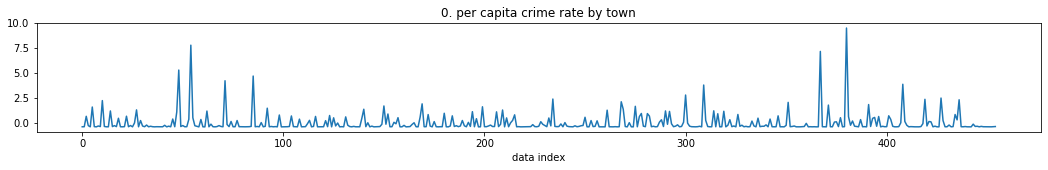

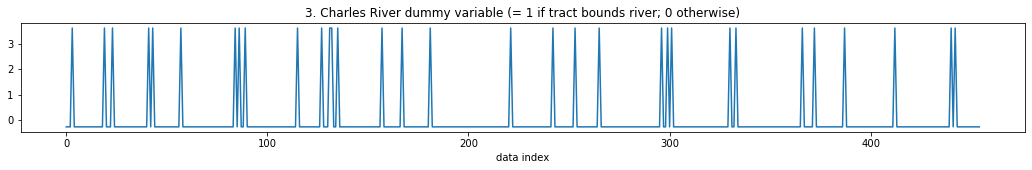

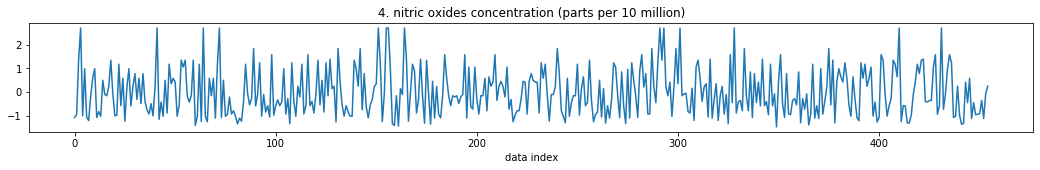

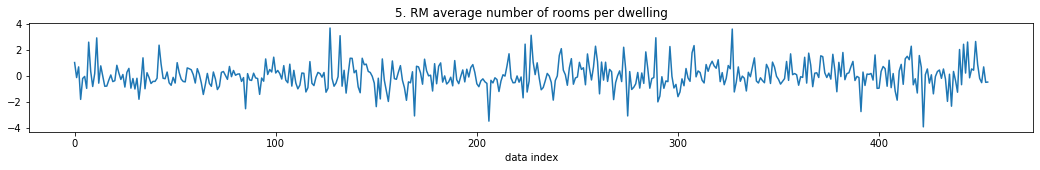

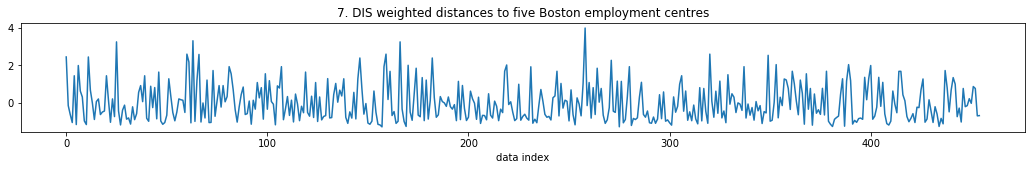

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=[18, 2])
plt.title('0. per capita crime rate by town')
plt.plot(X_train[:, 0])
plt.xlabel('data index')
plt.show()

plt.figure(figsize=[18, 2])
plt.title('3. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)')
plt.plot(X_train[:, 3])
plt.xlabel('data index')
plt.show()

plt.figure(figsize=[18, 2])
plt.title('4. nitric oxides concentration (parts per 10 million)')
plt.plot(X_train[:, 4])
plt.xlabel('data index')
plt.show()

plt.figure(figsize=[18, 2])
plt.title('5. RM average number of rooms per dwelling')
plt.plot(X_train[:, 5])
plt.xlabel('data index')
plt.show()

plt.figure(figsize=[18, 2])
plt.title('7. DIS weighted distances to five Boston employment centres')
plt.plot(X_train[:, 7])
plt.xlabel('data index')
plt.show()

### scikit-learn의 BayesianRidge class의 인스턴스를 생성합니다.

In [161]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
print(reg)

BayesianRidge()


### X_train과 y_train 데이터를 이용하여 트레이닝합니다.

In [162]:
reg.fit(X_train, y_train)
print('done')

done


### 트레이닝 이후에 맞춰진 precision of the noise $\alpha$와 precision of the weights $\lambda$값을 확인합니다.

In [163]:
print('alpha (precision of the noise) :', reg.alpha_)
print('lambda (precision of the weights) :', reg.lambda_)

alpha (precision of the noise) : 3.632203854420383
lambda (precision of the weights) : 20.51059810008498


### 각 항목에 대한 weight의 mean의 크기를 확인합니다.
weight가 클수록 해당 항목이 주택가격을 결정하는데 많은 역할을 한다고 볼 수 있습니다.

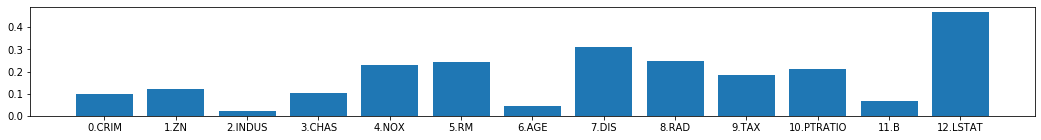

In [164]:
import numpy as np
plt.figure(figsize=[18, 2])
plt.bar([x for x in range(13)], np.abs(reg.coef_))
plt.xticks([x for x in range(13)], 
           ['0.CRIM', '1.ZN', '2.INDUS', '3.CHAS', '4.NOX', '5.RM', '6.AGE', 
            '7.DIS', '8.RAD', '9.TAX', '10.PTRATIO', '11.B', '12.LSTAT'])
plt.show()

### X_test 데이터에 대해 주택가격을 예측합니다.
이 떄, point estimation이 아닌 predicted distribution를 구하며, 파라메터로 mean과 standard deviation을 받습니다.

In [165]:
y_predict_mean, y_predict_std = reg.predict(X_test, return_std=True)
print('prediction mean shape:', y_predict_mean.shape, 'prediction std shape:', y_predict_std.shape)

prediction mean shape: (51,) prediction std shape: (51,)


### 예측한 값과 실제 값을 비교하고, 불확실성을 표시합니다.

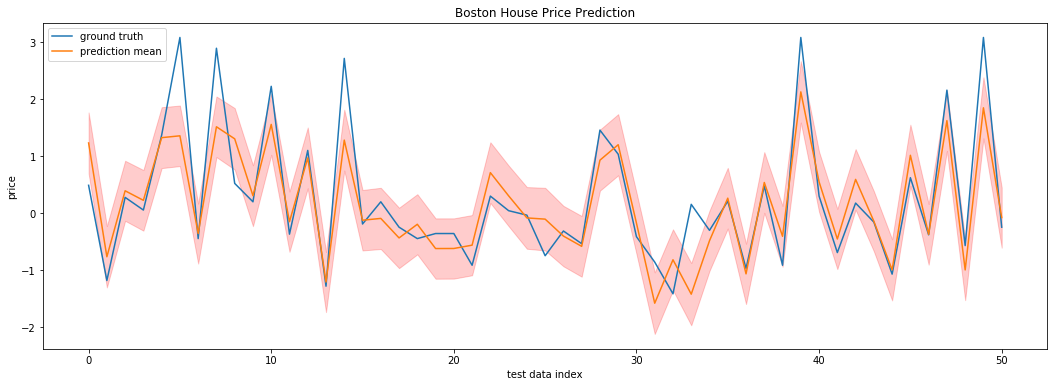

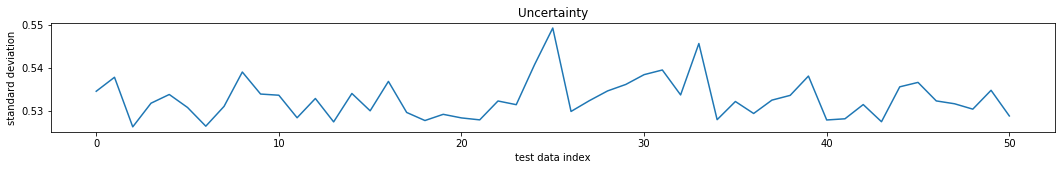

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=[18, 6])
plt.title('Boston House Price Prediction')
plt.plot(y_test, label='ground truth')
plt.plot(y_predict_mean, label='prediction mean')
plt.plot()
plt.fill_between(list(range(len(y_test))), 
                 y_predict_mean-y_predict_std, 
                 y_predict_mean+y_predict_std
                 , color='red', alpha=0.2)
plt.legend()
plt.xlabel('test data index')
plt.ylabel('price')
plt.show()

plt.figure(figsize=[18, 2])
plt.title('Uncertainty')
plt.plot(y_predict_std)
plt.xlabel('test data index')
plt.ylabel('standard deviation')
plt.show()